# Compare methods with optimize parameters in ref_case

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np

import hvplot.xarray
import hvplot.pandas

import matplotlib.pyplot as plt
from cycler import cycler

from sstats import signals as sg
from sstats import sigp as sigp
from sstats import tseries as ts
from sstats import get_cmap_colors

import hvplot.xarray
import hvplot.pandas
import holoviews as hv

import pynsitu as pyn
import lib as lib
from lib import KEYS, raw_dir, images_dir
import os
from glob import glob

import synthetic_traj as st

from synthetic_traj import (
    synthetic_traj,
    noise_irregular_sampling,
    random_time_begin,
    ref_case,
    typical_case,
)

In [ ]:
def ms_diff(DF, true_key, var=["x", "y", "u", "v", "ax", "ay", "X", "U", "Axy"]):
    DF = DF.copy()
    dft = DF[true_key]
    dft_ = (dft.set_index("id")[var]).groupby("id").var()
    dfms = pd.DataFrame(index=DF.keys(), columns=var)
    dfmsr = pd.DataFrame(index=DF.keys(), columns=var)
    for l in DF:
        df = DF[l]
        if np.all(df.index.values == dft.index.values):
            df_ = df.set_index("id")[var] - dft.set_index("id")[var]
            # dfr_ = (df.set_index('id')[var]-dft.set_index('id')[var])/dft.set_index('id')[var]
            dfms.loc[l] = df_.groupby("id").var().mean()
            dfmsr.loc[l] = (df_.groupby("id").var() / dft_).mean()
        else:
            print(l + " has not the same time index")
            continue
    dfms = pd.concat(
        [dfms, dfmsr.rename(columns={v: "ratio_" + v for v in var})], axis=1
    ).dropna()
    return dfms

___________
# Reference case + centered_diff

In [ ]:
N = 100
acc_cut = 1e-3
position_noise = 20
ntype = "white_noise"
offset_type = "svp_scripps_10"
dt_smooth = "30min"
true_key = "True_" + dt_smooth
spectral_diff = False
ref_case["spectral_diff"] = spectral_diff
print(ref_case)

dt_rd_begin = 10*60

In [6]:
DF = dict()

# TRUE
t = (
    50,
    "1min",
)  # use it instead of (50, 1/24/60 because otherwise not regularly sampled
dst = synthetic_traj(t, N, **ref_case)  # u,v, ax, ay computed
dft = st.dataset2dataframe(dst).rename(columns={"draw": "id"})

DF["True_1min"] = dft

# OBSERVED
dso = noise_irregular_sampling(
    dst, t, position_noise, ntype=ntype, offset_type=offset_type, istart=4067
)
dso_ = dso
dso_ = st.random_time_begin(dso, dt=dt_rd_begin)#add random begining
dfo = st.dataset2dataframe_drop(dso_).rename(columns={"draw": "id"})
dfo = dfo.groupby("id").apply(pyn.geo.compute_dt, time="index")

DF["Observed"] = dfo

centred diff
centred diff
-13394.13809599264
4067


In [7]:
dfo[dfo.id==0]

id             x              y  time_days  \
time                                                                        
2000-01-01 00:14:21.596941285   0     45.529725    -152.120706   0.006944   
2000-01-01 00:24:21.596941285   0     49.956221    -308.118726   0.013889   
2000-01-01 00:34:21.596941285   0     54.895443    -432.357609   0.020833   
2000-01-01 00:44:21.596941285   0     98.728242    -565.378631   0.027778   
2000-01-01 00:54:21.596941285   0     94.735960    -680.930471   0.034722   
...                            ..           ...            ...        ...   
2000-02-19 23:14:21.596941285   0  87631.806419 -183240.040382  49.965278   
2000-02-19 23:24:21.596941285   0  87674.998082 -183397.628518  49.972222   
2000-02-19 23:34:21.596941285   0  87746.761760 -183624.097678  49.979167   
2000-02-19 23:44:21.596941285   0  87776.741556 -183774.138301  49.986111   
2000-02-19 23:54:21.596941285   0  87816.175815 -183972.189621  49.993056   

                                 x_noise    y_noise              X         u  \
time                                                                           
2000-01-01 00:14:21.596941285  23.678038   3.896791     158.788114  0.006523   
2000-01-01 00:24:21.596941285   8.385097  -3.337394     312.142232  0.007805   
2000-01-01 00:34:21.596941285  -7.769566  10.337732     435.828649  0.040643   
2000-01-01 00:44:21.596941285  17.040573   6.140374     573.934022  0.033200   
2000-01-01 00:54:21.596941285  -3.599485  11.989533     687.489060 -0.012860   
...                                  ...        ...            ...       ...   
2000-02-19 23:14:21.596941285  42.011893   5.065456  203116.335865  0.143755   
2000-02-19 23:24:21.596941285  15.410118  24.613721  203277.139478  0.095796   
2000-02-19 23:34:21.596941285  30.475963 -23.131394  203512.415954  0.084786   
2000-02-19 23:44:21.596941285  13.671356   6.265875  203660.723426  0.057845   
2000-02-19 23:54:21.596941285  16.002535 -19.387406  203856.437938 -0.019673   

                                      v         U        ax        ay  \
time                                                                    
2000-01-01 00:14:21.596941285 -0.312929  0.312997  0.000001  0.000088   
2000-01-01 00:24:21.596941285 -0.233531  0.233661  0.000001  0.000088   
2000-01-01 00:34:21.596941285 -0.214383  0.218202  0.000108 -0.000024   
2000-01-01 00:44:21.596941285 -0.207144  0.209788 -0.000133  0.000049   
2000-01-01 00:54:21.596941285 -0.219413  0.219789 -0.000021 -0.000089   
...                                 ...       ...       ...       ...   
2000-02-19 23:14:21.596941285 -0.279601  0.314392 -0.000239  0.000057   
2000-02-19 23:24:21.596941285 -0.320048  0.334077  0.000079 -0.000191   
2000-02-19 23:34:21.596941285 -0.313758  0.325012 -0.000116  0.000212   
2000-02-19 23:44:21.596941285 -0.290077  0.295788  0.000026 -0.000133   
2000-02-19 23:54:21.596941285 -0.122687  0.124254  0.000026 -0.000133   

                                    Axy        au        av       Auv     dt  
time                                                                          
2000-01-01 00:14:21.596941285  0.000088  0.000028  0.000082  0.000087  600.0  
2000-01-01 00:24:21.596941285  0.000088  0.000028  0.000082  0.000087  600.0  
2000-01-01 00:34:21.596941285  0.000111  0.000021  0.000022  0.000031  600.0  
2000-01-01 00:44:21.596941285  0.000141 -0.000045 -0.000004  0.000045  600.0  
2000-01-01 00:54:21.596941285  0.000092  0.000021 -0.000006  0.000022  600.0  
...                                 ...       ...       ...       ...    ...  
2000-02-19 23:14:21.596941285  0.000246 -0.000066 -0.000025  0.000071  600.0  
2000-02-19 23:24:21.596941285  0.000207 -0.000049 -0.000028  0.000057  600.0  
2000-02-19 23:34:21.596941285  0.000242 -0.000032  0.000025  0.000040  600.0  
2000-02-19 23:44:21.596941285  0.000136 -0.000087  0.000159  0.000181  600.0  
2000-02-19 23:54:21.596941285  0.000136 -0.000087  0.000159  0.000181  600.0  

[7046 rows

In [9]:
from lib import doc_dir
#dst.to_netcdf(doc_dir + '/dst.nc')
dso_.to_netcdf(doc_dir+ '/dso_.nc')

In [10]:
# SMOOTHED
parameters_var = dict(
    acc_cut=1,
    position_error=60,
    acceleration_amplitude=4e-6,
    acceleration_T=0.05 * 86400,
    time_chunk=2,
    acc_cut_key=("ax", "ay", "Axy"),
)
parameters_lowess = dict(degree=2, iteration=3, T_low_pass = 1, cutoff_low_pass = 11.5)
parameters_spydell = dict(nb_pt_mean=5, acc_cut=1)

t_target=dt_smooth

dfl = pyn.drifters.smooth_all(
    dfo,
    "lowess",
    t_target,
    parameters=parameters_lowess,
    spectral_diff=spectral_diff,
    geo=False,
)
dfl.to_csv(doc_dir+ '/dfl.csv')

dfv = pyn.drifters.smooth_all(
    dfo,
    "variational",
    t_target,
    parameters=parameters_var,
    spectral_diff=spectral_diff,
    geo=False,
)
dfv.to_csv(doc_dir+ '/dfv.csv')

dfs = pyn.drifters.smooth_all(
    dfo,
    "spydell",
    t_target,
    parameters=parameters_spydell,
    spectral_diff=spectral_diff,
    geo=False,
)

dfs.to_csv(doc_dir+ '/dfs.csv')

DF["LOWESS"] = dfl
DF["Variational"] = dfv
DF["Empirical"] = dfs
color = {
    "True_1min": "grey",
    "Observed": "gold",
    f"True_{dt_smooth}": "k",
    "LOWESS": "teal",
    "Variational": "salmon",
    "Empirical": "r",
}


Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd with 1pad
Divided into 1 segments
LOW-PASS : 11.5cpd wit

In [11]:
# INTERPOLATED TRUE
dsti = dst.sel(time=dfl.index.unique())
dsti["dt"] = dsti.time.diff("time") / pd.Timedelta("1s")
st.add_position_noise(
    dsti, dsti.time, position_noise, ntype=ntype, inplace=True
)  # adding noise
dsti["u_noise"] = dsti.x_noise.differentiate("time", datetime_unit="s")
dsti["v_noise"] = dsti.y_noise.differentiate("time", datetime_unit="s")
dfti = st.dataset2dataframe(dsti).rename(columns={"draw": "id"})
dfti = dfti.groupby("id").apply(
    pyn.geo.compute_velocities,
    time="index",
    distance="xy",
    names=("u", "v", "U"),
    centered=True,
    keep_dt=True,
    fill_startend=True,
)
dfti = dfti.groupby("id").apply(
    pyn.geo.compute_accelerations,
    from_=("xy", "x", "y"),
    names=("ax", "ay", "Axy"),
    keep_dt=True,
    fill_startend=True,
)
dfti = dfti.groupby("id").apply(
    pyn.geo.compute_accelerations,
    from_=("xy", "x_noise", "y_noise"),
    names=("ax_noise", "ay_noise", "Axy_noise"),
    keep_dt=True,
    fill_startend=True,
)
dsti = dfti.reset_index().set_index(["time", "id"]).to_xarray()

DF["True_" + dt_smooth] = dfti

___________
# HVPLOT

In [24]:
def hvplot_DF(DF, d, var=None):
    if not var:
        var = ["x", "y", "u", "v", "ax", "ay"]
    Hv = []
    for v in var:
        init = 0
        for l in DF:
            df = DF[l]
            if init == 0:
                hvplot = df[df.id == d][v].hvplot(
                    label=l, kind="scatter", color=color[l]
                )
                init = 1
            hvplot *= df[df.id == d][v].hvplot(label=l, kind="scatter", color=color[l])
        Hv.append(hvplot)
    print(len(Hv))
    layout = hv.Layout(Hv[0] + Hv[1] + Hv[2] + Hv[3] + Hv[4] + Hv[5]).cols(2)
    return layout

In [26]:
d = 0
DF0 = DF.copy()
DF0.pop("True_1min")
hvplot_DF(DF0, d, ["x", "y", "u", "v", "ax", "ay"])

6


:Layout
   .Overlay.I   :Overlay
      .Scatter.Observed.I  :Scatter   [time]   (x)
      .Scatter.Observed.II :Scatter   [time]   (x)
      .Scatter.LOWESS      :Scatter   [time]   (x)
      .Scatter.Variational :Scatter   [time]   (x)
      .Scatter.Empirical   :Scatter   [time]   (x)
      .Scatter.True_30min  :Scatter   [time]   (x)
   .Overlay.II  :Overlay
      .Scatter.Observed.I  :Scatter   [time]   (y)
      .Scatter.Observed.II :Scatter   [time]   (y)
      .Scatter.LOWESS      :Scatter   [time]   (y)
      .Scatter.Variational :Scatter   [time]   (y)
      .Scatter.Empirical   :Scatter   [time]   (y)
      .Scatter.True_30min  :Scatter   [time]   (y)
   .Overlay.III :Overlay
      .Scatter.Observed.I  :Scatter   [time]   (u)
      .Scatter.Observed.II :Scatter   [time]   (u)
      .Scatter.LOWESS      :Scatter   [time]   (u)
      .Scatter.Variational :Scatter   [time]   (u)
      .Scatter.Empirical   :Scatter   [time]   (u)
      .Scatter.True_30min  :Scatter   [time]   (u)
   .Overlay.IV  :Overlay
      .Scatter.Observed.I  :Scatter   [time]   (v)
      .Scatter.Observed.II :Scatter   [time]   (v)
      .Scatter.LOWESS      :Scatter   [time]   (v)
      .Scatter.Variational :Scatter   [time]   (v)
      .Scatter.Empirical   :Scatter   [time]   (v)
      .Scatter.True_30min  :Scatter   [time]   (v)
   .Overlay.V   :Overlay
      .Scatter.Observed.I  :Scatter   [time]   (ax)
      .Scatter.Observed.II :Scatter   [time]   (ax)
      .Scatter.LOWESS      :Scatter   [time]   (ax)
      .Scatter.Variational :Scatter   [time]   (ax)
      .Scatter.Empirical   :Scatter   [time]   (ax)
      .Scatter.True_30min  :Scatter   [time]   (ax)
   .Overlay.VI  :Overlay
      .Scatter.Observed.I  :Scatter   [time]   (ay)
      .Scatter.Observed.II :Scatter   [time]   (ay)
      .Scatter.LOWESS      :Scatter   [time]   (ay)
      .Scatter.Variational :Scatter   [time]   (ay)
      .Scatter.Empirical   :Scatter   [time]   (ay)
      .Scatter.True_30min  :Scatter   [time]   (ay)

In [15]:
DF_diff = st.build_DF_diff(DF0, true_key=f"True_{dt_smooth}")

Observed has not the same time index


In [25]:
d = 0
hvplot_DF(DF_diff, d, ["x", "y", "u", "v", "ax", "ay"])

6


:Layout
   .Overlay.I   :Overlay
      .Scatter.LOWESS.I    :Scatter   [time]   (x)
      .Scatter.LOWESS.II   :Scatter   [time]   (x)
      .Scatter.Variational :Scatter   [time]   (x)
      .Scatter.Empirical   :Scatter   [time]   (x)
   .Overlay.II  :Overlay
      .Scatter.LOWESS.I    :Scatter   [time]   (y)
      .Scatter.LOWESS.II   :Scatter   [time]   (y)
      .Scatter.Variational :Scatter   [time]   (y)
      .Scatter.Empirical   :Scatter   [time]   (y)
   .Overlay.III :Overlay
      .Scatter.LOWESS.I    :Scatter   [time]   (u)
      .Scatter.LOWESS.II   :Scatter   [time]   (u)
      .Scatter.Variational :Scatter   [time]   (u)
      .Scatter.Empirical   :Scatter   [time]   (u)
   .Overlay.IV  :Overlay
      .Scatter.LOWESS.I    :Scatter   [time]   (v)
      .Scatter.LOWESS.II   :Scatter   [time]   (v)
      .Scatter.Variational :Scatter   [time]   (v)
      .Scatter.Empirical   :Scatter   [time]   (v)
   .Overlay.V   :Overlay
      .Scatter.LOWESS.I    :Scatter   [time]   (ax)
      .Scatter.LOWESS.II   :Scatter   [time]   (ax)
      .Scatter.Variational :Scatter   [time]   (ax)
      .Scatter.Empirical   :Scatter   [time]   (ax)
   .Overlay.VI  :Overlay
      .Scatter.LOWESS.I    :Scatter   [time]   (ay)
      .Scatter.LOWESS.II   :Scatter   [time]   (ay)
      .Scatter.Variational :Scatter   [time]   (ay)
      .Scatter.Empirical   :Scatter   [time]   (ay)

In [11]:
dfti

id     u_low     v_low      u_ni      v_ni  u_2  v_2  \
time                                                                        
2000-01-01 00:17:00   0 -0.145368 -0.388111 -0.029118 -0.198986  0.0  0.0   
2000-01-01 00:50:00   0 -0.158625 -0.374138 -0.038852 -0.180695  0.0  0.0   
2000-01-01 01:23:00   0 -0.171974 -0.360286 -0.053118 -0.190889  0.0  0.0   
2000-01-01 01:56:00   0 -0.185170 -0.346795 -0.085780 -0.189315  0.0  0.0   
2000-01-01 02:29:00   0 -0.197970 -0.333863 -0.122959 -0.167106  0.0  0.0   
...                  ..       ...       ...       ...       ...  ...  ...   
2000-02-19 21:38:00  19 -0.163006  0.374208  0.021650  0.020186  0.0  0.0   
2000-02-19 22:11:00  19 -0.166861  0.371688  0.030270  0.002069  0.0  0.0   
2000-02-19 22:44:00  19 -0.171362  0.369576  0.022510 -0.020316  0.0  0.0   
2000-02-19 23:17:00  19 -0.176742  0.368167  0.019844 -0.023031  0.0  0.0   
2000-02-19 23:50:00  19 -0.183193  0.367756  0.022420 -0.024757  0.0  0.0   

                     u_1  v_1        uo  ...            av       Auv      dt  \
time                                     ...                                   
2000-01-01 00:17:00 -0.0  0.0 -0.174486  ... -1.690203e-05  0.000017  1980.0   
2000-01-01 00:50:00 -0.0  0.0 -0.197477  ...  1.610362e-05  0.000042  1980.0   
2000-01-01 01:23:00 -0.0  0.0 -0.225092  ...  8.635242e-06  0.000038  1980.0   
2000-01-01 01:56:00 -0.0  0.0 -0.270950  ...  3.988074e-05  0.000040  1980.0   
2000-01-01 02:29:00 -0.0  0.0 -0.320929  ...  6.154453e-07  0.000031  1980.0   
...                  ...  ...       ...  ...           ...       ...     ...   
2000-02-19 21:38:00 -0.0  0.0 -0.141355  ... -6.218185e-06  0.000009  1980.0   
2000-02-19 22:11:00 -0.0  0.0 -0.136591  ... -8.792301e-07  0.000032  1980.0   
2000-02-19 22:44:00 -0.0  0.0 -0.148853  ... -4.272654e-06  0.000041  1980.0   
2000-02-19 23:17:00  0.0 -0.0 -0.156898  ... -2.460733e-05  0.000028  1980.0   
2000-02-19 23:50:00  0.0 -0.0 -0.160773  ...  9.175793e-06  0.000015  1980.0   

                       x_noise    y_noise   u_noise   v_noise  ax_noise  \
time                                                                      
2000-01-01 00:17:00   2.514604   6.911684 -0.002568 -0.003409 -0.000004   
2000-01-01 00:50:00  -2.570693   0.162844 -0.006994 -0.007944 -0.000004   
2000-01-01 01:23:00 -25.181311 -24.547041 -0.001555  0.000232  0.000010   
2000-01-01 01:56:00  -8.728705   1.082046  0.007311  0.010115 -0.000001   
2000-01-01 02:29:00   3.770384  15.506476  0.004743 -0.003563 -0.000002   
...                        ...        ...       ...       ...       ...   
2000-02-19 21:38:00   9.225503 -29.110288  0.003429 -0.005038 -0.000015   
2000-02-19 22:11:00 -13.078412 -22.017402 -0.000031 -0.000054  0.000011   
2000-02-19 22:44:00   9.102211 -29.323612  0.001328  0.007936 -0.000010   
2000-02-19 23:17:00  -7.819552   9.409690 -0.013017 -0.004516 -0.000005   
2000-02-19 23:50:00 -42.443741 -47.206184 -0.017487 -0.028594 -0.000005   

                     ay_noise  Axy_noise  
time                                      
2000-01-01 00:17:00 -0.000005   0.000006  
2000-01-01 00:50:00 -0.000005   0.000006  
2000-01-01 01:23:00  0.000013   0.000016  
2000-01-01 01:56:00 -0.000003   0.000003  
2000-01-01 02:29:00 -0.000011   0.000011  
...                       ...        ...  
2000-02-19 21:38:00  0.000009   0.000017  
2000-02-19 22:11:00 -0.000004   0.000012  
2000-02-19 22:44:00  0.000012   0.000015  
2000-02-19 23:17:00 -0.000024   0.000025  
2000-02-19 23:50:00 -0.000024   0.000025  

[43640 rows x 32 columns]

In [12]:
dfo

id              x             y  time_days    x_noise  \
time                                                                         
2000-01-01 00:10:00   0    -102.068411 -3.198333e+02   0.006944 -13.270704   
2000-01-01 00:20:00   0    -199.706428 -7.365457e+02   0.013889  -7.208803   
2000-01-01 00:30:00   0    -324.429531 -1.079961e+03   0.020833 -23.136602   
2000-01-01 00:40:00   0    -426.733895 -1.423642e+03   0.027778 -14.722647   
2000-01-01 00:50:00   0    -502.438586 -1.744509e+03   0.034722  23.678038   
...                  ..            ...           ...        ...        ...   
2000-02-19 23:10:00  19  233400.866808  1.147588e+06  49.965278  16.916592   
2000-02-19 23:20:00  19  233294.208550  1.147813e+06  49.972222   1.620897   
2000-02-19 23:30:00  19  233201.148190  1.148022e+06  49.979167   2.860005   
2000-02-19 23:40:00  19  233097.115578  1.148221e+06  49.986111  -6.656923   
2000-02-19 23:50:00  19  232986.339875  1.148417e+06  49.993056 -21.885470   

                       y_noise             X         u         v         U  \
time                                                                         
2000-01-01 00:10:00  36.568605  3.357251e+02 -0.117588 -0.816682  0.825104   
2000-01-01 00:20:00 -27.459339  7.631397e+02 -0.185301 -0.633440  0.659987   
2000-01-01 00:30:00 -17.093029  1.127639e+03 -0.189190 -0.572580  0.603026   
2000-01-01 00:40:00 -13.949538  1.486223e+03 -0.148341 -0.553790  0.573313   
2000-01-01 00:50:00   3.896791  1.815421e+03 -0.204252 -0.551773  0.588364   
...                        ...           ...       ...       ...       ...   
2000-02-19 23:10:00 -10.073392  1.171083e+06 -0.138012  0.349784  0.376026   
2000-02-19 23:20:00   5.771321  1.171282e+06 -0.166432  0.361061  0.397574   
2000-02-19 23:30:00   6.870061  1.171468e+06 -0.164244  0.339609  0.377240   
2000-02-19 23:40:00   1.266218  1.171642e+06 -0.179007  0.329067  0.374604   
2000-02-19 23:50:00  -9.317387  1.171812e+06 -0.191675  0.316478  0.369997   

                           ax            ay       Axy        au        av  \
time                                                                        
2000-01-01 00:10:00 -0.000075  2.036029e-04  0.000217 -0.000060  0.000203   
2000-01-01 00:20:00 -0.000075  2.036029e-04  0.000217 -0.000060  0.000203   
2000-01-01 00:30:00  0.000062 -7.376949e-07  0.000062  0.000031  0.000066   
2000-01-01 00:40:00  0.000074  6.337249e-05  0.000097 -0.000013  0.000017   
2000-01-01 00:50:00 -0.000260 -5.665122e-05  0.000266 -0.000074  0.000003   
...                       ...           ...       ...       ...       ...   
2000-02-19 23:10:00 -0.000133  8.339763e-05  0.000157 -0.000025  0.000019   
2000-02-19 23:20:00  0.000038 -4.580629e-05  0.000059 -0.000022 -0.000008   
2000-02-19 23:30:00 -0.000030 -2.570057e-05  0.000040 -0.000010 -0.000027   
2000-02-19 23:40:00 -0.000019 -9.440239e-06  0.000021 -0.000023 -0.000019   
2000-02-19 23:50:00 -0.000019 -9.440239e-06  0.000021 -0.000023 -0.000019   

                          Auv     dt  
time                                  
2000-01-01 00:10:00  0.000212  600.0  
2000-01-01 00:20:00  0.000212  600.0  
2000-01-01 00:30:00  0.000073  600.0  
2000-01-01 00:40:00  0.000021  600.0  
2000-01-01 00:50:00  0.000074  600.0  
...                       ...    ...  
2000-02-19 23:10:00  0.000031  600.0  
2000-02-19 23:20:00  0.000023  600.0  
2000-02-19 23:30:00  0.000029  600.0  
2000-02-19 23:40:00  0.000030  600.0  
2000-02-19 23:50:00  0.000030  600.0  

[140940 rows x 17 columns]

___________
# MS

In [17]:
dfms = ms_diff(DF0, true_key="True_" + dt_smooth).astype(float)
dfr = dfms[[l for l in dfms.columns if "ratio_" in l]]
dfr = dfr.rename(columns={l: l.replace("ratio_", "") for l in dfr.columns}) * 100

Observed has not the same time index


In [18]:
dfms

x              y         u         v            ax  \
LOWESS       157327.293728  159096.306222  0.000356  0.000355  2.708167e-11   
Variational   15356.355990   15361.533843  0.000085  0.000087  2.786474e-11   
Empirical    442826.631706  509605.328300  0.000136  0.000135  6.793232e-11   
True_30min        0.000000       0.000000  0.000000  0.000000  0.000000e+00   

                       ay              X         U           Axy  \
LOWESS       2.719381e-11  162052.030710  0.000318  2.218169e-11   
Variational  2.803938e-11   15665.544621  0.000097  2.551956e-11   
Empirical    6.619759e-11  425410.821101  0.000131  8.453310e-11   
True_30min   0.000000e+00       0.000000  0.000000  0.000000e+00   

                  ratio_x       ratio_y   ratio_u   ratio_v  ratio_ax  \
LOWESS       6.155744e-06  6.075071e-06  0.003241  0.003236  0.103187   
Variational  5.762407e-07  6.116274e-07  0.000777  0.000790  0.106018   
Empirical    1.835226e-05  1.877720e-05  0.001244  0.001231  0.259441   
True_30min   0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000   

             ratio_ay       ratio_X   ratio_U  ratio_Axy  
LOWESS       0.103680  4.452567e-06  0.006127   0.215152  
Variational  0.106728  4.043337e-07  0.001846   0.247450  
Empirical    0.252552  1.123644e-05  0.002563   0.818643  
True_30min   0.000000  0.000000e+00  0.000000   0.000000

In [19]:
dfr = dfr.iloc[:-1]

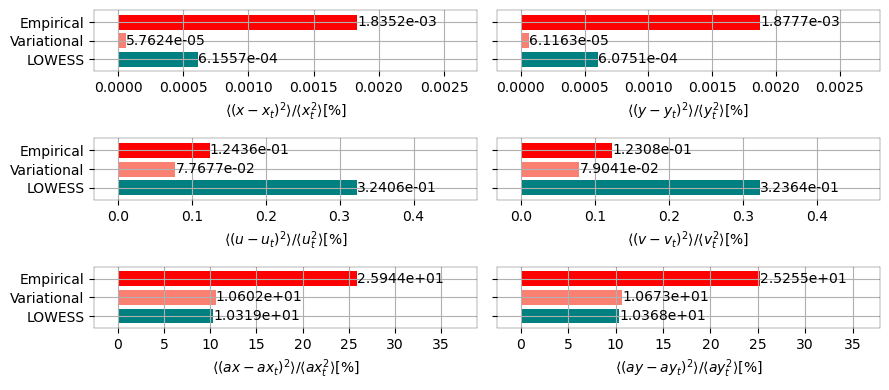

In [22]:
fig, axs = plt.subplots(3, 2, sharey=True, figsize=(9, 4))
i = 0
axs = axs.flatten()
for var in [
    "x",
    "y",
    "u",
    "v",
    "ax",
    "ay",
]:
    ax = axs[i]
    dfr[var].plot.barh(ax=ax, color=["teal", "salmon", "r"], width=0.8)
    ax.grid()
    ax.set_xlim(-0.1 * dfr[var].max(), dfr[var].max() * 1.5)
    i += 1
    ax.set_xlabel(
        rf"$\langle ({var}-{var}_t)^2 \rangle / \langle {var}_t^2 \rangle [\%]$"
    )
    ax.bar_label(
        ax.containers[0],
        labels=[
            np.format_float_scientific(l, precision=4, exp_digits=2)
            for l in dfr[var].values
        ],
    )
fig.tight_layout()
# fig.suptitle('refcase =' +str(ref_case) + '\n spydell ' +str(parameters_spydell)+'\n variational '+str(parameters_var)+'\n lowess '+str(parameters_lowess),
#            x= 0.5, y=-0.02, fontsize=8)
path = os.path.join(images_dir, "comp_method_ref_case.png")
fig.savefig(path, dpi=250)

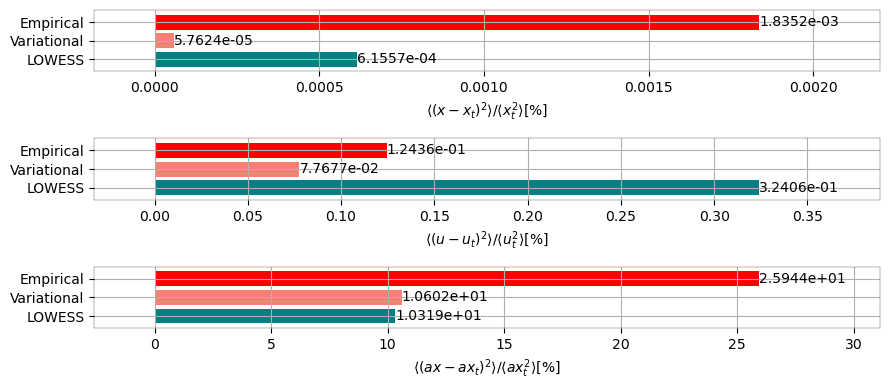

In [23]:
fig, axs = plt.subplots(3, 1, sharey=True, figsize=(9, 4))
i = 0
axs = axs.flatten()
for var in [
    "x",
    "u",
    "ax",
]:
    ax = axs[i]
    dfr[var].plot.barh(ax=ax, color=["teal", "salmon", "r"], width=0.8)
    ax.grid()
    ax.set_xlim(-0.1 * dfr[var].max(), dfr[var].max() * 1.2)
    i += 1
    ax.set_xlabel(
        rf"$\langle ({var}-{var}_t)^2 \rangle / \langle {var}_t^2 \rangle [\%]$"
    )
    ax.bar_label(
        ax.containers[0],
        labels=[
            np.format_float_scientific(l, precision=4, exp_digits=2)
            for l in dfr[var].values
        ],
    )
fig.tight_layout()
# fig.suptitle('refcase =' +str(ref_case) + '\n spydell ' +str(parameters_spydell)+'\n variational '+str(parameters_var)+'\n lowess '+str(parameters_lowess),
#            x= 0.5, y=-0.02, fontsize=8)
path = os.path.join(images_dir, "comp_method_ref_case1.png")
fig.savefig(path, dpi=250)